In [4]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
import sklearn.metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Top 11 Features and their Mutual Information:
            Feature  Mutual_Info
1         Perimeter     1.056907
6        ConvexArea     1.038620
7     EquivDiameter     1.037142
0              Area     1.036810
2   MajorAxisLength     0.996402
13     ShapeFactor2     0.954653
12     ShapeFactor1     0.931138
3   MinorAxisLength     0.928023
11      Compactness     0.835597
14     ShapeFactor3     0.835584
5      Eccentricity     0.819633


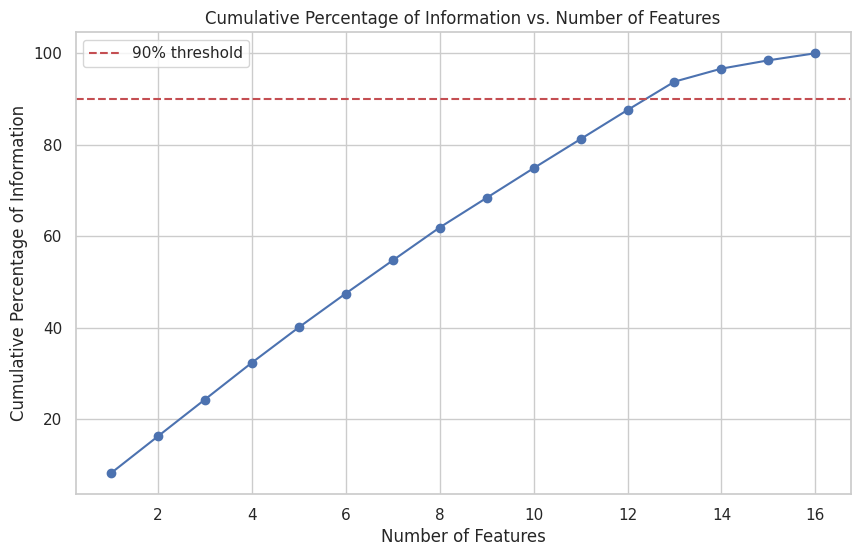

In [17]:
df = pd.read_csv("/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset.csv")

# Extract features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Calculate mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame to store feature names and their corresponding mutual information
feature_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mutual_info})

# Sort the DataFrame based on mutual information in descending order
feature_info_df = feature_info_df.sort_values(by='Mutual_Info', ascending=False)

# Specify the desired percentage of information to retain
desired_percentage = 90

# Calculate the cumulative percentage of information
cumulative_percentage = (feature_info_df['Mutual_Info'].cumsum() / feature_info_df['Mutual_Info'].sum()) * 100

# Find the index where cumulative percentage crosses or exceeds the desired percentage
k_index = (cumulative_percentage >= desired_percentage).idxmax()

# Extract the top k features based on the calculated index
top_k_features = feature_info_df.iloc[:k_index + 1]

# Print the top k features and their mutual information
print(f"Top {k_index + 1} Features and their Mutual Information:")
print(top_k_features)

# Optionally, you can plot the cumulative percentage for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, marker='o')
plt.axhline(y=desired_percentage, color='r', linestyle='--', label=f'{desired_percentage}% threshold')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Percentage of Information')
plt.title(f'Cumulative Percentage of Information vs. Number of Features')
plt.legend()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

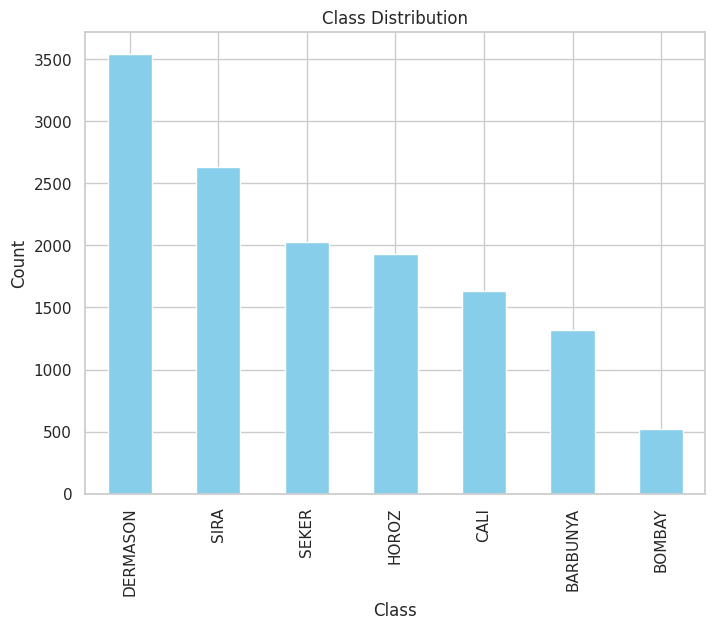

Class Counts:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
class_counts = df['Class'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Printing class counts
print("Class Counts:")
print(class_counts)


In [19]:
X, Y = df.iloc[:, :16], df["Class"]
# Uncomment this line to select best 16 features, 16 features is chosen through pca
# X = pd.DataFrame(SelectKBest(f_classif, k=16).fit_transform(X, Y))

X_val, X_test, y_val, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


print("=========================================================")

kEq3 = knn(n_neighbors=3)

kEq3.fit(X_val, y_val)

y_prediction = kEq3.predict(X_test)

print(
    "validation accuracy(k=3) = {}".format(
        sklearn.metrics.accuracy_score(y_pred=y_prediction, y_true=y_test)
    )
    + "\n validation recall (k=3) = {}".format(
        sklearn.metrics.recall_score(
            y_pred=y_prediction, y_true=y_test, average="macro"
        )
    )
)

print(sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_prediction))

print("=========================================================")

kEq1 = knn(n_neighbors=1)

kEq1.fit(X_val, y_val)

y_prediction = kEq1.predict(X_test)

print(
    "validation accuracy(k=1) = {}".format(
        sklearn.metrics.accuracy_score(y_pred=y_prediction, y_true=y_test)
    )
    + "\n validation recall (k=1) = {}".format(
        sklearn.metrics.recall_score(
            y_pred=y_prediction, y_true=y_test, average="macro"
        )
    )
)

print(sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_prediction))

print("======================================")

validation accuracy(k=3) = 0.7242899118511263
 validation recall (k=3) = 0.7194593238188247
[[187   0 155   0  38   0  15]
 [  0 161   0   0   0   0   0]
 [160   0 289   0  27   1   2]
 [  0   0   0 924   1  54  64]
 [ 54   0  23  19 403   2  87]
 [  3   0   1 117   8 396  94]
 [ 10   0   3 108  52  28 598]]
validation accuracy(k=1) = 0.7382468168462292
 validation recall (k=1) = 0.7346014123513341
[[170   0 159   0  48   0  18]
 [  0 161   0   0   0   0   0]
 [134   0 307   0  35   2   1]
 [  0   0   0 893   6  55  89]
 [ 36   0  33  11 436   2  70]
 [  2   0   1  78   4 444  90]
 [  8   0   4  88  46  49 604]]


In [15]:
# HistGradientBoostingClassifier model
hgbc_model = HistGradientBoostingClassifier()

# Define hyperparameters for grid search
param_grid = {
    'learning_rate': [0.05],
    'max_iter': [100],
    'max_depth': [5],
    'min_samples_leaf': [12,24,36]
}

# Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 12}

# Perform Grid Search
grid_search = GridSearchCV(estimator=hgbc_model, param_grid=param_grid, cv=5, scoring='accuracy',verbose=1)
grid_search.fit(X_val, y_val)

print("Params : {}".format(grid_search.cv_results_["params"]))
print("Test Score : {}".format(grid_search.cv_results_["mean_test_score"]))
print("Best Params : {}".format(grid_search.best_params_))

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_hgbc_model = HistGradientBoostingClassifier(**best_params)
best_hgbc_model.fit(X_val, y_val)

# Make predictions on the test set
pred_y = best_hgbc_model.predict(X_test)

# Evaluate the model
accuracy = best_hgbc_model.score(X_test, y_test)
print("Accuracy:", accuracy)

classification_rep = sklearn.metrics.classification_report(y_true=y_test, y_pred=pred_y)
print(classification_rep)

conf_matrix = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=pred_y)
print("Confusion Matrix:")
print(conf_matrix)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Params : [{'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 12}, {'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 24}, {'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 36}]
Test Score : [0.92757338 0.92725869 0.92631436]
Best Params : {'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 12}
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 12}
Accuracy: 0.9267874632713027
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.95      0.94       479
    DERMASON       0.91      0.92      0.91      1043
       HOROZ       0.97      0.96      0.96       588
       SEKER       0.95      0.94      0.94       619
        SIRA       0.88      0

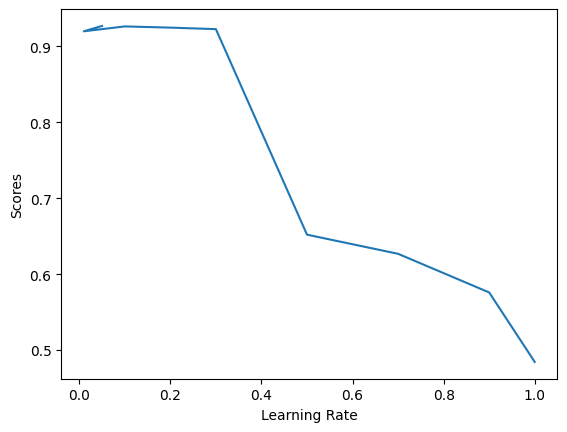

In [1]:
import matplotlib.pyplot as plt

# plot for learning rate, at max_iterations = 100
# and max tree_depth = 5
Test_Scores = [
    0.9270488100000001,
    0.9199814900000001,
    0.9263841666666667,
    0.92480982,
    0.9228152199999999,
    0.6520160033333333,
    0.6267855733333333,
    0.5758617566666666,
    0.48434542333333336,
]

plt.figure()

plt.plot([0.05, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1], Test_Scores)

plt.ylabel("Scores")

plt.xlabel("Learning Rate")

plt.show()

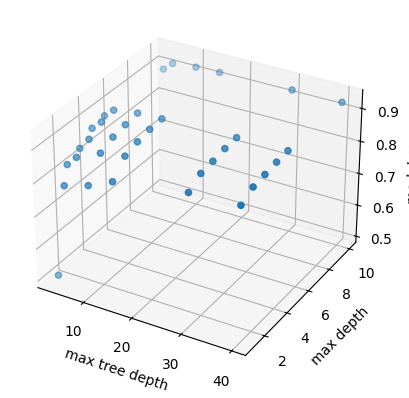

In [2]:
max_iterations = [
    3, 5, 10, 15, 30, 40,
    3, 5, 10, 15, 30, 40,
    3, 5, 10, 15, 30, 40,
    3, 5, 10, 15, 30, 40,
    3, 5, 10, 15, 30, 40,
    3, 5, 10, 15, 30, 40
]

max_depth = [
    1, 1, 1, 1, 1, 1,
    2, 2, 2, 2, 2, 2,
    3, 3, 3, 3, 3, 3,
    4, 4, 4, 4, 4, 4,
    5, 5, 5, 5, 5, 5,
    10,10,10,10,10,10
]

Test_Score = [0.51065474, 0.79542321, 0.81736073, 0.85031928, 0.88359373, 0.89073119,
              0.82019383, 0.85021298, 0.88338249, 0.89545362, 0.90805022, 0.91193402,
              0.83940384, 0.87477555, 0.90175206, 0.9081551, 0.9134034, 0.91728703,
              0.87089187, 0.89755363, 0.9097293, 0.9161324, 0.92064628, 0.92285073,
              0.88012977, 0.90500621, 0.91602752, 0.91875663, 0.92347993, 0.92631453,
              0.88642805, 0.91140892, 0.91865153, 0.92106551, 0.92494904, 0.92631359
]

fig = plt.figure()

ax = fig.add_subplot(projection="3d")

ax.scatter(max_iterations, max_depth, Test_Score)

ax.set_ylabel("max depth")

ax.set_xlabel("max tree depth")

ax.set_zlabel("model score")

plt.show()

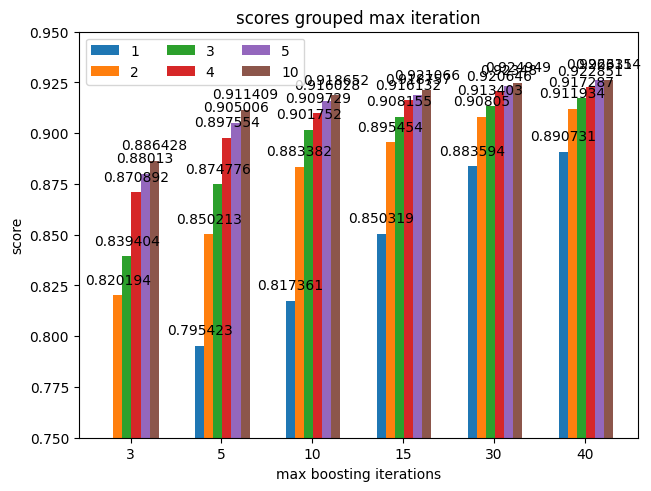

In [5]:
max_iterations = (3, 5, 10, 15, 30, 40)

Test_Scores_clustered = {
    1: (0.51065474, 0.79542321, 0.81736073, 0.85031928, 0.88359373, 0.89073119),
    2: (0.82019383, 0.85021298, 0.88338249, 0.89545362, 0.90805022, 0.91193402),
    3: (0.83940384, 0.87477555, 0.90175206, 0.9081551, 0.9134034, 0.91728703),
    4: (0.87089187, 0.89755363, 0.9097293, 0.9161324, 0.92064628, 0.92285073),
    5: (0.88012977, 0.90500621, 0.91602752, 0.91875663, 0.92347993, 0.92631453),
    10: (0.88642805, 0.91140892, 0.91865153, 0.92106551, 0.92494904, 0.92631359),
}

x = np.arange(len(max_iterations))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in Test_Scores_clustered.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=6)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("score")
ax.set_xlabel("max boosting iterations")
ax.set_title("scores grouped max iteration")
ax.set_xticks(x + 2.4 * width, max_iterations)
ax.legend(loc="upper left", ncols=3)
ax.set_ylim(0.75, 0.95)

plt.show()

In [19]:
# Import necessary libraries
import pandas as pd

# Create a DataFrame with the true labels and predicted labels
result_df = pd.DataFrame({'True_Label': y_test, 'Predicted_Label': pred_y})

# Add a column indicating whether the prediction is correct
result_df['Correct_Prediction'] = result_df['True_Label'] == result_df['Predicted_Label']

# Filter the DataFrame to get instances with incorrect predictions
incorrect_predictions = result_df[result_df['Correct_Prediction'] == False]

# Print the instances with incorrect predictions
print("Instances with Incorrect Predictions:")
print(incorrect_predictions)

Instances with Incorrect Predictions:
      True_Label Predicted_Label  Correct_Prediction
13549   DERMASON            SIRA               False
7613        SIRA        DERMASON               False
2055    BARBUNYA            SIRA               False
4028        CALI        BARBUNYA               False
1197       SEKER        DERMASON               False
...          ...             ...                 ...
8681        SIRA           SEKER               False
4023        CALI           HOROZ               False
5646       HOROZ            SIRA               False
3884        CALI            SIRA               False
7634        SIRA        DERMASON               False

[299 rows x 3 columns]


In [7]:
# Load dataset
df = pd.read_csv("/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset.csv")
X, Y = df.iloc[:, :16], df["Class"]

# Uncomment this line to select the best 16 features using f_classif
X = pd.DataFrame(SelectKBest(f_classif, k=16).fit_transform(X, Y))

# Split the data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [30, 40, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# param_grid = {
#     'n_estimators': [30, 40, 50],
#     'max_depth': [20],
#     'min_samples_split': [2,3],
#     'min_samples_leaf': [1]
# }

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy',verbose=1)

grid_search.fit(X_val, y_val)

print("Params : {}".format(grid_search.cv_results_["params"]))
print("Test Score : {}".format(grid_search.cv_results_["mean_test_score"]))
print("Best Params : {}".format(grid_search.best_params_))

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_val, y_val)

# Make predictions on the test set
pred_y = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

classification_rep = sklearn.metrics.classification_report(y_true=y_test, y_pred=pred_y)
print(classification_rep)

conf_matrix = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=pred_y)
print("Confusion Matrix:")
print(conf_matrix)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Params : [{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 30}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 40}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}, {'max_depth': None, 'min_samples_leaf': 1, 'm

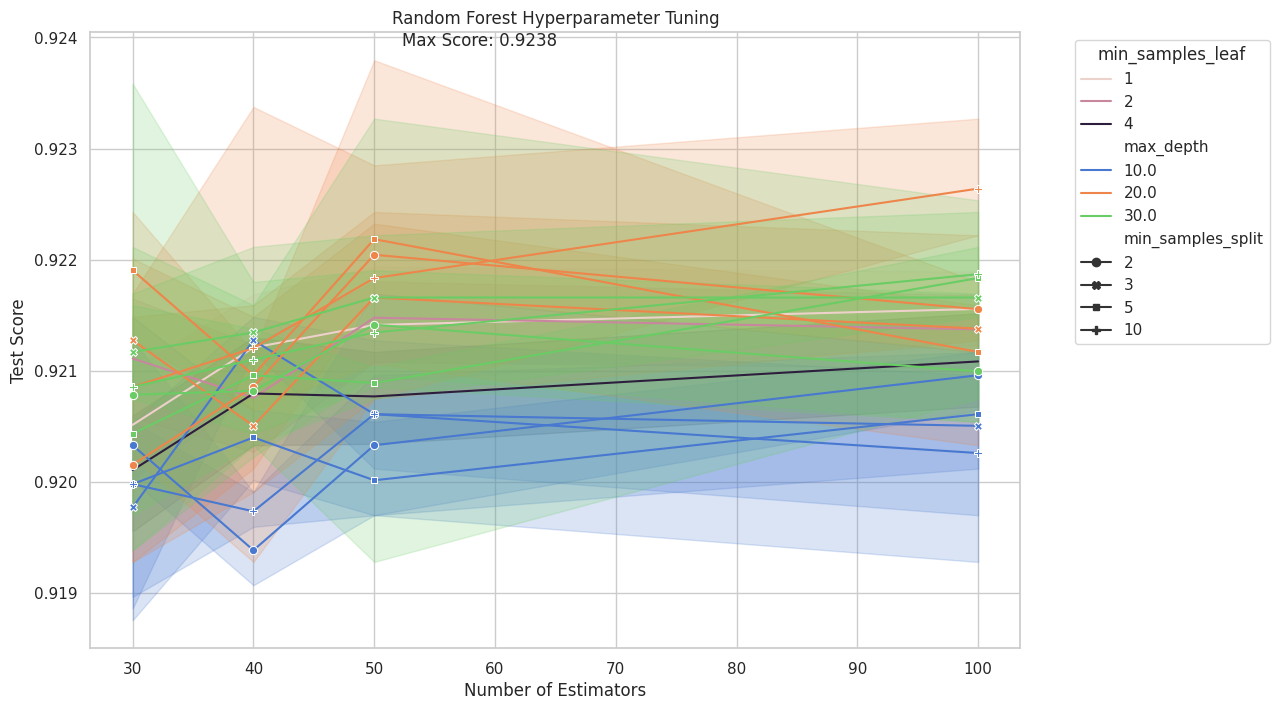

In [9]:
params = grid_search.cv_results_["params"]
test_scores = grid_search.cv_results_["mean_test_score"]
# Create a DataFrame for better handling
results_df = pd.DataFrame(params)
results_df["Test Score"] = test_scores

# Set the option to handle inf values as NaN
pd.set_option('mode.use_inf_as_na', True)

# Replace inf values with NaN in the results_df
results_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the plot using seaborn's lineplot
plot = sns.lineplot(
    x='n_estimators',
    y='Test Score',
    hue='min_samples_leaf',
    markers=True,
    dashes=False,
    data=results_df
)

# Customize the plot to include max_depth as hue
plot = sns.lineplot(
    x='n_estimators',
    y='Test Score',
    hue='max_depth',
    style='min_samples_split',
    markers=True,
    dashes=False,
    data=results_df,
    palette="muted",  # You can customize the color palette if needed
)

# Find the row with the maximum 'Test Score'
best_params_row = results_df.loc[results_df['Test Score'].idxmax()]

# Annotate the point with the highest score
plt.annotate(
    f'Max Score: {best_params_row["Test Score"]:.4f}',
    xy=(best_params_row['n_estimators'], best_params_row['Test Score']),
    xytext=(20, 10),
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
)

# Set plot labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Test Score')
plt.title('Random Forest Hyperparameter Tuning')

# Add legend
plt.legend(title='min_samples_leaf', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()